In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('prices.txt', 'r') as file:
    lines = file.readlines()[1:]   
    data = [line.split() for line in lines]
    column_names=data[0]
    df = pd.DataFrame(data[1:], columns=column_names)
    Date = pd.to_datetime(df[['#yyyy', 'mm', 'dd']].astype(str).agg('-'.join, axis=1))
    df = df.drop(['#yyyy', 'mm', 'dd'], axis=1)
    df = df[df.columns].apply(pd.to_numeric, errors='coerce')
    #df['Date']=Date


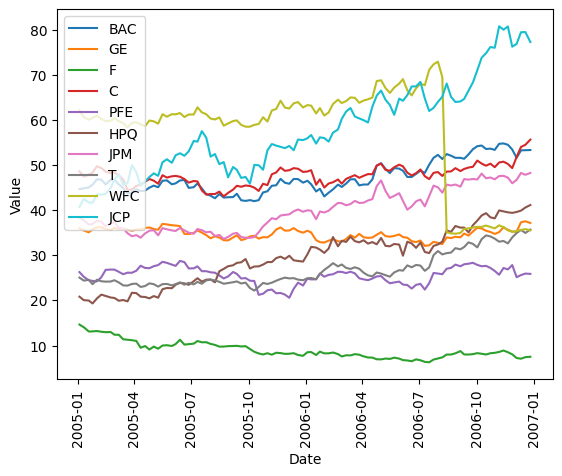

In [3]:
for column in df.columns: plt.plot(Date, df[column], label=column)

plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.legend()


plt.show()

In [18]:
R_column_names=['R_'+name for name in list(df.columns)]
R_df = df[df.columns].div(df[df.columns].shift(-1))
R_df = R_df.dropna()

In [5]:
#for column in R_df.columns: plt.plot(df[['Date']][:-1], R_df[column], label=column)

#plt.xlabel('Date')
#plt.xticks(rotation='vertical')
#plt.ylabel('Return')
#plt.legend()


#plt.show()

In [19]:
R_means=R_df.mean()

In [20]:
from itertools import product
column_combinations = list(product(R_df.columns, repeat=2))

# Create a new DataFrame with the combinations as columns
RR_df = pd.DataFrame({f'{col1}_{col2}': R_df[col1] * R_df[col2] for col1, col2 in column_combinations})

RR_means=RR_df.mean()

S=np.array(RR_means).reshape(10, 10)
S_inv=np.linalg.inv(S)

In [21]:
T=R_df.shape[0]
J=R_df.shape[1]

#----------------------------------------------k_q------------------------------------------------------
k_q=[0 for _ in range(T)]

t=0
i=0
#print(len(k_q))
for t in range(T):
    for i in range(J):
        #print('i='+str(i))
        #print('R[t,i]='+str(R_df.iloc[t,i]))
        #print('sum(S_inv[i:])='+str(sum(S_inv[i,:])))
        k_q[t]=k_q[t]+(R_df.iloc[t,i]*sum(S_inv[i,:]))
    #print('k_q[t]'+str(k_q[t]))

#----------------------------------------------k_e------------------------------------------------------
k_e=[0 for _ in range(T)]

t=0
i=0
for t in range(T):
    for j in range(J):
         k_e[t]=k_e[t]+(R_df.iloc[t,i]*np.dot(S_inv[i,:],R_means))  
#print(len(k_e))
#print(np.dot(k_e,k_q))

In [9]:
#k_ek_e=np.mean(np.multiply(k_e, k_e))
R_e=k_e/np.mean(np.multiply(k_e, k_e))
R_q=k_q/np.mean(np.multiply(k_q, k_q))
sig2_q=np.var(R_q)

In [10]:
l_m= np.cov(R_e-R_q,R_e)[1,0]/np.var(R_q-R_e)
l_m.shape
R_m= R_e+ l_m*(R_q-R_e)
sig2_m=np.var(R_e)-l_m*(np.var(R_e)-np.cov(R_q,R_e)[1,0])                 

In [11]:
#Answer to the first question of exercize 3
c_e=[0 for _ in range(J)]

j=0

for j in range(J):
    c_e[j]=(np.dot(S_inv[i,:],R_means)/df.iloc[-1,j])
    
print('This is the MV-portfolio\n')
print(c_e)
print('\n')

This is the MV-portfolio

[0.005826090594570683, 0.008359445763077903, 0.04141877188337268, 0.0055844699612949515, 0.01200984466579648, 0.007551711018308541, 0.00644006163238362, 0.008700838513122484, 0.00874732780776515, 0.004020876122597322]




In [15]:
#Here I check if it acutally is the MV between the other securities I have, just for curiosity
MV_z=np.dot(c_e, df.T)

df_n=df.copy()
df_n['MV_z']=MV_z
k=0
V=[0 for _ in range(len(df_n.columns))]
for column in df_n.columns:
    #df_n[column]
    V[k]=np.var(df_n[column])
    k=k+1

#print(V)
#print(min(V)) #Actually it has the lowest variance! (even if this check is only bewteen these securirties and not all the portfolio)


In [26]:
print(np.square(sig_z))
print(sig_z**2)

[1.0000000e-04 1.2100000e-04 1.4400000e-04 ... 9.9940009e+01 9.9960004e+01
 9.9980001e+01]
[1.0000000e-04 1.2100000e-04 1.4400000e-04 ... 9.9940009e+01 9.9960004e+01
 9.9980001e+01]


In [54]:
#Answer to the second question of exercize 3
sig_z=np.arange(0.00005,0.01,0.000001)
sig2_z=sig_z**2
def ER_z(sig2_z):
    ER_z_eff=np.mean(R_m)+(np.sqrt((sig2_z-sig2_m)/(sig2_q-sig2_m))*(np.mean(R_q)-np.mean(R_m)))
    ER_z_ineff=np.mean(R_m)-(np.sqrt((sig2_z-sig2_m)/(sig2_q-sig2_m))*(np.mean(R_q)-np.mean(R_m)))
    return [ER_z_eff,ER_z_ineff]

[ER_z_eff,ER_z_ineff]=ER_z(sig_z)


Dot sig_1 has sig=0.02 and expected return E[R]=0.35381334243102097

Dot sig_2 has sig=0.04 and expected return E[R]=0.38822206968196415



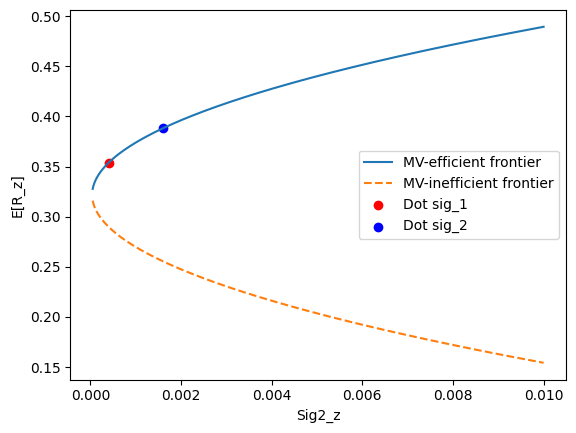

In [55]:
#Answer to the third qeustion of exercise 3
sig_1=0.02
sig_2=0.04

ER_1=ER_z(sig_1**2)[0]
ER_2=ER_z(sig_2**2)[0]

print('Dot sig_1 has sig='+str(sig_1)+' and expected return E[R]='+str(ER_1)+'\n')
print('Dot sig_2 has sig='+str(sig_2)+' and expected return E[R]='+str(ER_2)+'\n')

plt.plot(sig_z, ER_z_eff, label='MV-efficient frontier')
plt.plot(sig_z, ER_z_ineff,  linestyle='--',label='MV-inefficient frontier')
plt.scatter(sig_1**2, ER_1, color='red', label='Dot sig_1')
plt.scatter(sig_2**2, ER_2, color='blue', label='Dot sig_2')
# Add labels and a legend
plt.xlabel('Sig2_z')
plt.ylabel('E[R_z]')
plt.legend()

# Show the plot
plt.show()